# Appendix

In [ ]:
#Load the dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/Shared drives/Data 690 - Group 3/Group 3 - Final Project/World_Bank-World_Development_Indicators_2012-2021.xlsx"
world_dev = pd.read_excel(path)

Mounted at /content/drive


In [ ]:
world_dev

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,23,24.8,26.1,27.4,28.6,29.7,30.9,31.9,33.2,..
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,8.2,9.1,10.2,11.1,12.2,13,13.85,15.1,15.9,..
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,74.4,75.7,77.6,78.8,79.7,80.9,81.6,82.3,82.6,..
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.099998,68.290649,89.5,71.5,97.699997,97.699997,96.616135,97.699997,97.699997,..
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,60.849155,60.566135,86.500511,64.573357,97.099358,97.091972,95.586174,97.07563,97.066711,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383567,World,WLD,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,..,..,..,..,..,..,..,..,..,..
383568,World,WLD,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,..,..,..,..,..,..,..,..,..,..
383569,World,WLD,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,..,..,..,..,..,..,..,..,..,..
383570,World,WLD,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,52.7,52.9,53.1,53.2,53.4,53.5,53.6,53.7,53.8,53.8


In [ ]:
unique_countries = world_dev['Country Name'].nunique()

In [ ]:
print(f'The number of unique countries in the dataset is: {unique_countries}')

The number of unique countries in the dataset is: 266


In [ ]:
unique_series = world_dev['Series Name'].nunique()

In [ ]:
print(f'The number of unique series in the dataset is: {unique_series}')

The number of unique series in the dataset is: 1442


# Data Fields:

### Hypothesis 1: 
1.   **GDP per capita (current US$)** - GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
2.   **School enrollment, secondary (% gross)** - Gross enrollment ratio is the ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Secondary education completes the provision of basic education that began at the primary level, and aims at laying the foundations for lifelong learning and human development, by offering more subject- or skill-oriented instruction using more specialized teachers.

### Hypothesis 2:
1.   **Renewable energy consumption (% of total final energy consumption)** - Renewable energy consumption is the share of renewables energy in total final energy consumption.
2.   **CO2 emissions (metric tons per capita)** - Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.

### Hypothesis 3:
1.   **Domestic general government health expenditure (% of general government expenditure)** - Public expenditure on health from domestic sources as a share of total public expenditure.  It indicates the priority of the government to spend on health from own domestic public resources.
2.   **Mortality rate, infant (per 1,000 live births)** - Infant mortality rate is the number of infants dying before reaching one year of age, per 1,000 live births in a given year.

# Hypothesis 1: Is there a significant correlation between a country's average years of schooling and its GDP per capita?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
world_dev = world_dev.replace('..',pd.NA)

In [ ]:
# Filter the data for the fields we're interested in
gdp_per_capita = world_dev[world_dev['Series Code'] == 'NY.GDP.PCAP.CD']
school_enrollment = world_dev[world_dev['Series Code'] == 'SE.SEC.ENRR']

In [ ]:
gdp_per_capita = gdp_per_capita.reset_index(drop=True)
school_enrollment = school_enrollment.reset_index(drop=True)

In [ ]:
years = ["2012 [YR2012]", "2013 [YR2013]", "2014 [YR2014]", "2015 [YR2015]", "2016 [YR2016]",
         "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]", "2021 [YR2021]"]

# Dataset Summary Stats

In [ ]:
melted_df = world_dev.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                    value_vars=years,
                    var_name='Year',
                    value_name='Value')

In [ ]:
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

In [ ]:
melted_df

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2012 [YR2012],23.000000
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,2012 [YR2012],8.200000
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,2012 [YR2012],74.400000
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,2012 [YR2012],69.099998
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2012 [YR2012],60.849155
...,...,...,...,...,...,...
3835715,World,WLD,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,2021 [YR2021],NaN
3835716,World,WLD,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,2021 [YR2021],NaN
3835717,World,WLD,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,2021 [YR2021],NaN
3835718,World,WLD,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2021 [YR2021],53.800000


In [ ]:
filtered_df = melted_df[melted_df['Series Code'].isin(['NY.GDP.PCAP.CD','SE.SEC.ENRR','EG.FEC.RNEW.ZS','EN.ATM.CO2E.PC','SH.XPD.GHED.GE.ZS','SP.DYN.IMRT.IN'])]

In [ ]:
grouped = filtered_df.groupby('Series Name')['Value'].describe()

In [ ]:
print("Summary statistics for each indicator name across all countries:")
grouped

Summary statistics for each indicator name across all countries:


,count,mean,std,min,25%,50%,75%,max
Series Name,,,,,,,,
CO2 emissions (metric tons per capita),1912.0,4.189075,4.733660,0.024987,0.777195,2.823908,6.058173,39.398425
Domestic general government health expenditure (% of general government expenditure),1657.0,10.254334,4.991370,0.633017,6.554263,9.657796,13.432652,31.290236
GDP per capita (current US$),2558.0,16471.532107,24834.321853,216.826741,2129.161052,6492.185570,19532.040974,234315.460504
"Mortality rate, infant (per 1,000 live births)",2440.0,23.555171,20.345678,1.000000,6.700000,16.050000,36.106522,101.000000
Renewable energy consumption (% of total final energy consumption),1896.0,29.240140,27.912017,0.000000,5.779444,19.960000,47.600000,97.030000
"School enrollment, secondary (% gross)",1679.0,84.315399,26.936094,5.507990,68.442596,90.440239,103.055172,163.934723


## Pearson Correlation Coefficient

In [ ]:
correlations = []
p_values = []

In [ ]:
# Loop through the years and calculate the correlation for each year
for year in years:
    # Select data for the specific year and drop any rows with missing data
    data_year = pd.DataFrame({
        'GDP': gdp_per_capita[year],
        'School': school_enrollment[year]
    }).dropna()

    # Calculate the correlation and p-value
    correlation, p_value = pearsonr(data_year['GDP'], data_year['School'])

    correlations.append(correlation)
    p_values.append(p_value)

In [ ]:
results = pd.DataFrame({
    'Year': years,
    'Correlation': correlations,
    'p_value': p_values
})

print(results)

            Year  Correlation       p_value
0  2012 [YR2012]     0.523726  1.237753e-14
1  2013 [YR2013]     0.535819  6.477594e-15
2  2014 [YR2014]     0.505752  1.797708e-13
3  2015 [YR2015]     0.512725  7.343474e-14
4  2016 [YR2016]     0.542147  3.838869e-15
5  2017 [YR2017]     0.558149  1.485408e-15
6  2018 [YR2018]     0.528729  4.602253e-14
7  2019 [YR2019]     0.552408  6.913317e-15
8  2020 [YR2020]     0.533731  3.668841e-13
9  2021 [YR2021]     0.449312  6.539362e-04


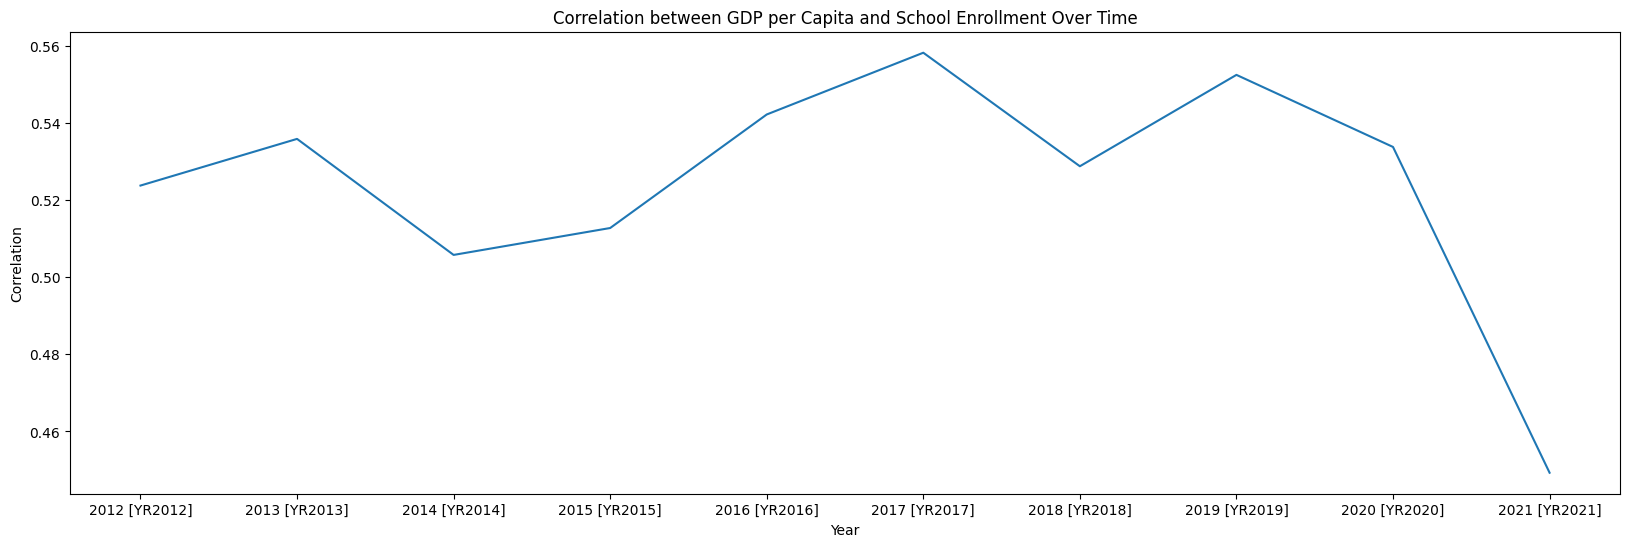

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=results, x='Year', y='Correlation')
plt.title('Correlation between GDP per Capita and School Enrollment Over Time')
plt.show()

## Spearman's Rank Correlation

In [ ]:
from scipy.stats import spearmanr

In [ ]:
spear_correlations = []
spear_p_values = []

In [ ]:
# Loop through the years and calculate the correlation for each year
for year in years:
    # Select data for the specific year and drop any rows with missing data
    data_year = pd.DataFrame({
        'GDP': gdp_per_capita[year],
        'School': school_enrollment[year]
    }).dropna()

    spearman_corr, spearman_p = spearmanr(data_year['GDP'], data_year['School'])

    spear_correlations.append(spearman_corr)
    spear_p_values.append(spearman_p)

In [ ]:
results_spear = pd.DataFrame({
    'Year': years,
    'Correlation': spear_correlations,
    'p_value': spear_p_values
})

print(results_spear)

            Year  Correlation       p_value
0  2012 [YR2012]     0.837235  1.217219e-50
1  2013 [YR2013]     0.822107  6.662114e-46
2  2014 [YR2014]     0.816544  8.941686e-46
3  2015 [YR2015]     0.826915  7.053455e-48
4  2016 [YR2016]     0.839040  6.278400e-49
5  2017 [YR2017]     0.840991  1.747293e-47
6  2018 [YR2018]     0.799183  2.583568e-40
7  2019 [YR2019]     0.805519  8.511618e-40
8  2020 [YR2020]     0.783950  1.566683e-34
9  2021 [YR2021]     0.587498  3.008345e-06


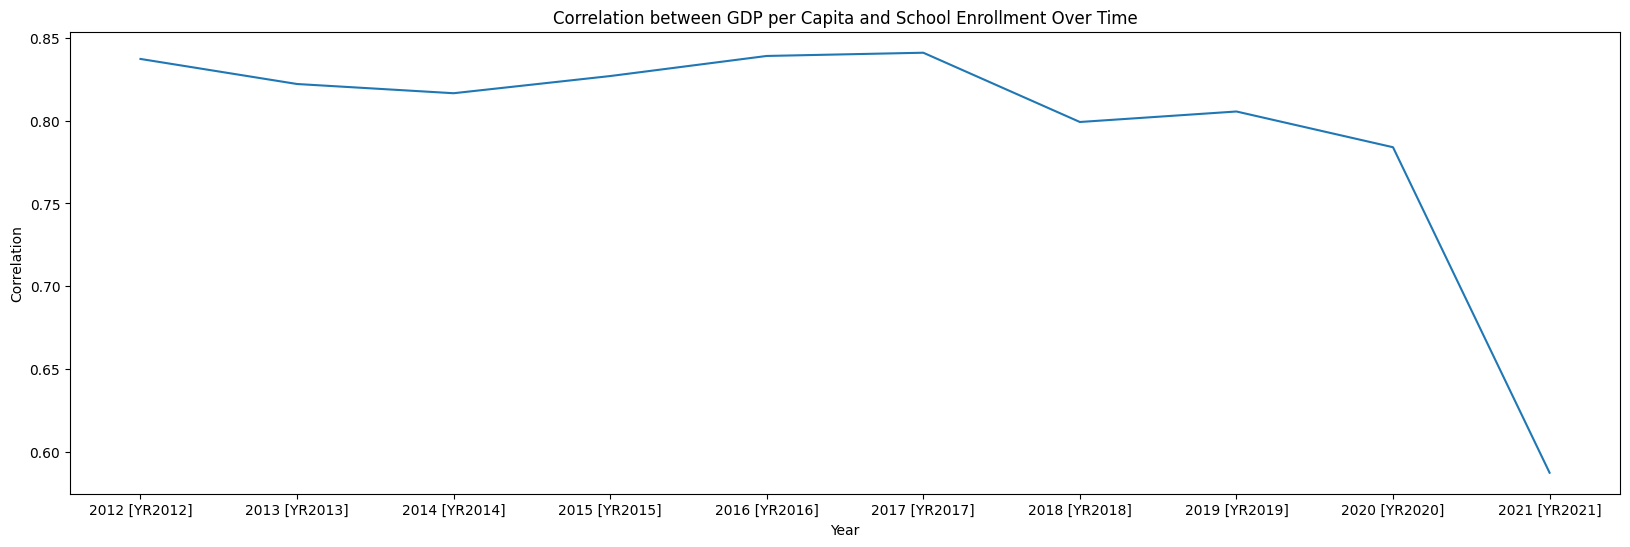

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=results_spear, x='Year', y='Correlation')
plt.title('Correlation between GDP per Capita and School Enrollment Over Time')
plt.show()

## Scatterplot with a Regression Line

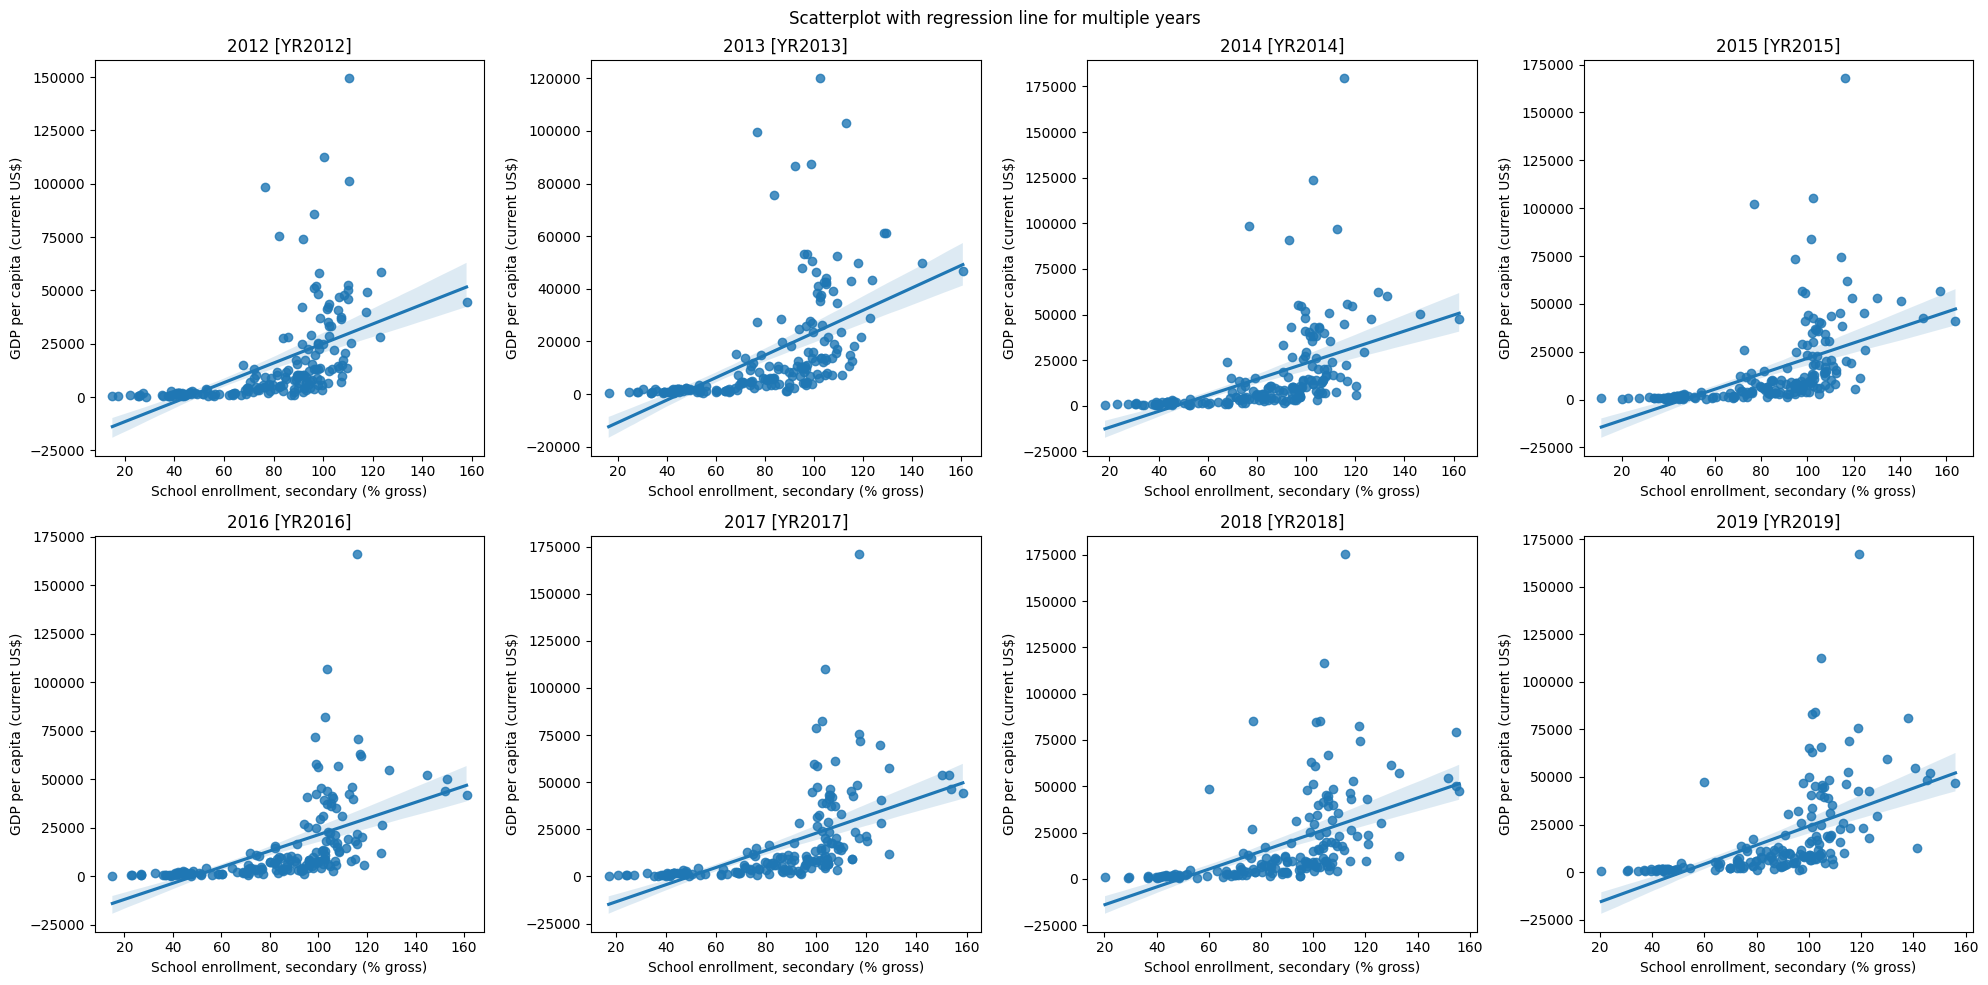

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for idx, year in enumerate(years):
    # Convert the data to numeric
    school_enrollment[year] = pd.to_numeric(school_enrollment[year], errors='coerce')
    gdp_per_capita[year] = pd.to_numeric(gdp_per_capita[year], errors='coerce')

    # Merge the school_enrollment and gdp_per_capita DataFrames on the 'Country Code' column
    merged_df = school_enrollment[['Country Code', year]].merge(gdp_per_capita[['Country Code', year]], on='Country Code', suffixes=('_enrollment', '_gdp'))

    # Drop rows containing NaN values
    merged_df = merged_df.dropna()

    # Calculate the subplot row and column
    row = idx // 4
    col = idx % 4

    # Create the scatterplot with regression line in the current subplot
    try:
      sns.regplot(x=merged_df[year + '_enrollment'], y=merged_df[year + '_gdp'], ax=axes[row, col])
    except:
      pass

    # Set plot labels
    try:
      axes[row, col].set_xlabel('School enrollment, secondary (% gross)')
      axes[row, col].set_ylabel('GDP per capita (current US$)')
      axes[row, col].set_title(f"{year}")
    except:
      pass

# Add a title for the entire figure
fig.suptitle("Scatterplot with regression line for multiple years")

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

# Hypothesis 2 - Is there a significant correlation between a country's renewable energy consumption and its CO2 emissions per capita?

## Pearson Correlation Coefficient

In [ ]:
# Filter the data for the fields we're interested in
re= world_dev[world_dev['Series Code'] == 'EG.FEC.RNEW.ZS']
co = world_dev[world_dev['Series Code'] == 'EN.ATM.CO2E.PC']

In [ ]:
re = re.reset_index(drop=True)
co = co.reset_index(drop=True)

In [ ]:
p2_correlations = []
p2_p_values = []

In [ ]:
# Loop through the years and calculate the correlation for each year
for year in years:
    # Select data for the specific year and drop any rows with missing data
    p2_data_year = pd.DataFrame({
        'Renewable Energy Consumption': re[year],
        'CO2 Emissions per Capita': co[year]
    }).dropna()

    # Calculate the correlation and p-value
    if len(p2_data_year['Renewable Energy Consumption']) >= 2 and len(p2_data_year['CO2 Emissions per Capita']) >= 2:
        # Calculate the correlation and p-value
        correlation, p_value = pearsonr(p2_data_year['Renewable Energy Consumption'], p2_data_year['CO2 Emissions per Capita'])
    else:
        correlation, p_value = None, None

    p2_correlations.append(correlation)
    p2_p_values.append(p_value)

In [ ]:
p2_results = pd.DataFrame({
    'Year': years,
    'Correlation_p2': p2_correlations,
    'p_value': p2_p_values
})
print(p2_results)

            Year  Correlation_p2       p_value
0  2012 [YR2012]       -0.575017  1.955206e-22
1  2013 [YR2013]       -0.565509  1.334480e-21
2  2014 [YR2014]       -0.559365  4.468685e-21
3  2015 [YR2015]       -0.554314  1.184686e-20
4  2016 [YR2016]       -0.536023  1.339659e-15
5  2017 [YR2017]       -0.538054  9.990913e-16
6  2018 [YR2018]       -0.539923  7.612893e-16
7  2019 [YR2019]       -0.532521  2.211221e-15
8  2020 [YR2020]             NaN           NaN
9  2021 [YR2021]             NaN           NaN


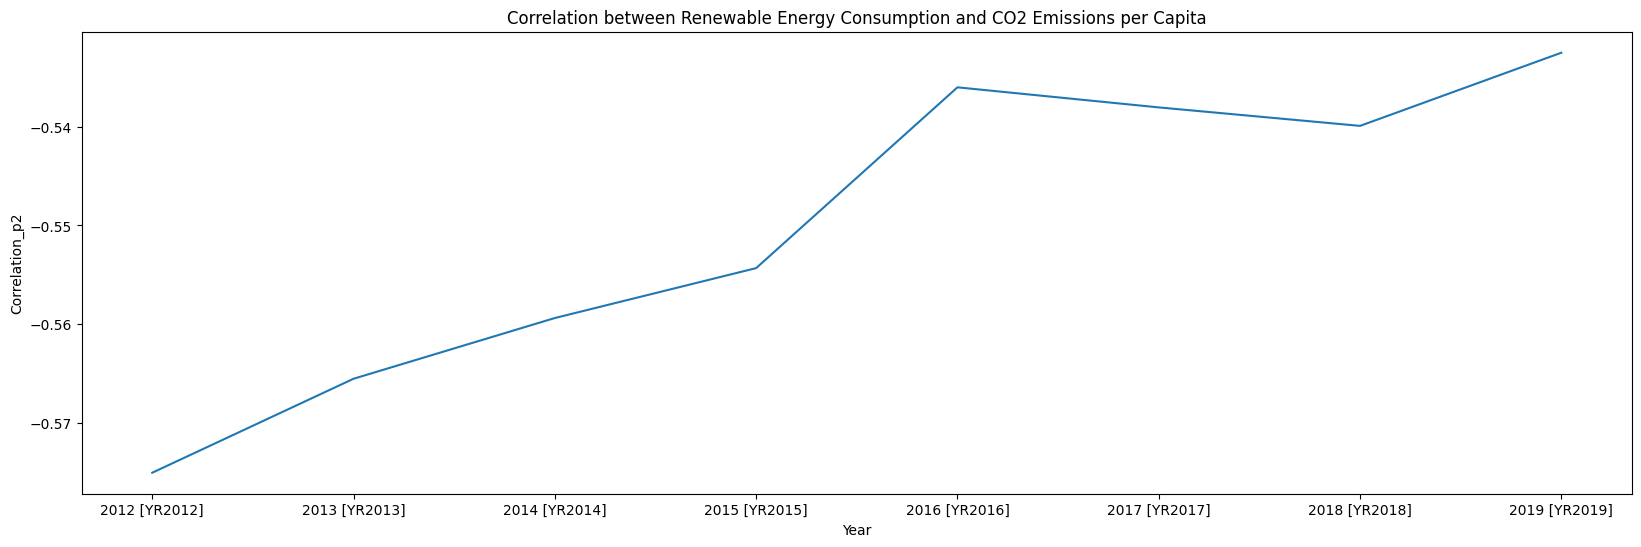

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x="Year", y="Correlation_p2", data=p2_results, ax=ax)
ax.set_title('Correlation between Renewable Energy Consumption and CO2 Emissions per Capita')
plt.show()

## Kendall Rank Correlation

In [ ]:
from scipy.stats import kendalltau
import seaborn as sns

In [ ]:
k_correlations = []
k_p_values = []

In [ ]:
# Loop through the years and calculate the correlation for each year
for year in years:
    # Select data for the specific year and drop any rows with missing data
    data_year = pd.DataFrame({
        'Renewable Energy Consumption': re[year],
        'CO2 Emissions per Capita': co[year]
    }).dropna()

    # Calculate the correlation and p-value using Kendall's rank correlation test
    if len(data_year['Renewable Energy Consumption']) >= 2 and len(data_year['CO2 Emissions per Capita']) >= 2:
        # Calculate the correlation and p-value
        correlation, p_value = kendalltau(data_year['Renewable Energy Consumption'], data_year['CO2 Emissions per Capita'])
    else:
        correlation, p_value = None, None

    k_correlations.append(correlation)
    k_p_values.append(p_value)

# Create a dataframe to store the results
k_results = pd.DataFrame({
    'Year': years,
    'Kendall Correlation': k_correlations,
    'p-value': k_p_values
})

print(k_results)

            Year  Kendall Correlation       p-value
0  2012 [YR2012]            -0.605465  3.834205e-44
1  2013 [YR2013]            -0.590596  4.424170e-42
2  2014 [YR2014]            -0.579799  1.280275e-40
3  2015 [YR2015]            -0.563888  1.606946e-38
4  2016 [YR2016]            -0.549780  1.460773e-29
5  2017 [YR2017]            -0.547544  2.443435e-29
6  2018 [YR2018]            -0.539206  1.671526e-28
7  2019 [YR2019]            -0.530978  1.083474e-27
8  2020 [YR2020]                  NaN           NaN
9  2021 [YR2021]                  NaN           NaN


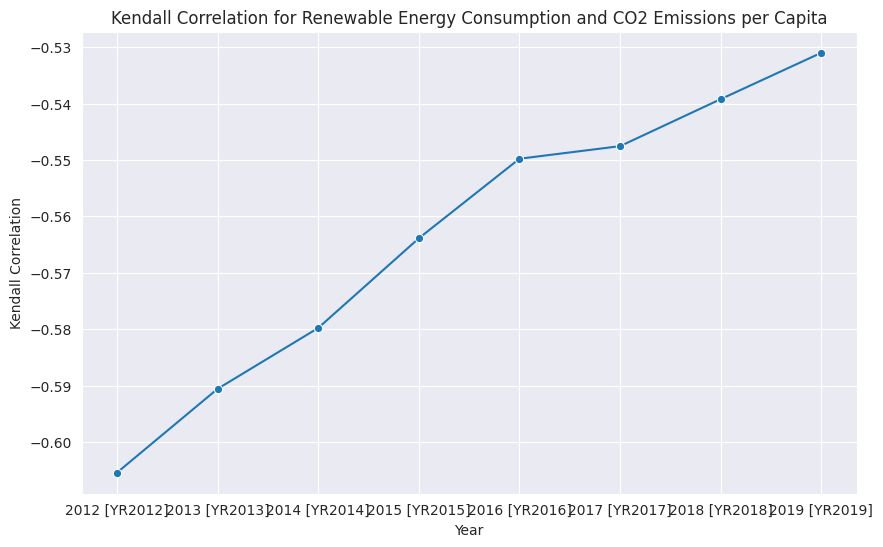

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
sns.set_style("darkgrid")
sns.lineplot(x="Year", y="Kendall Correlation", data=k_results, marker='o')
plt.xlabel("Year")
plt.ylabel("Kendall Correlation")
plt.title("Kendall Correlation for Renewable Energy Consumption and CO2 Emissions per Capita")
plt.show()

## Spearman's Rank Correlation

In [ ]:
s2_correlations = []
s2_p_values = []

In [ ]:
# Loop through the years and calculate the correlation for each year
for year in years:
    # Select data for the specific year and drop any rows with missing data
    s2_data_year = pd.DataFrame({
        'Renewable Energy Consumption': re[year],
        'CO2 Emissions per Capita': co[year]
    }).dropna()

    # Calculate the correlation and p-value
    if len(s2_data_year['Renewable Energy Consumption']) >= 2 and len(s2_data_year['CO2 Emissions per Capita']) >= 2:
        # Calculate the correlation and p-value
        correlation, p_value = spearmanr(s2_data_year['Renewable Energy Consumption'], s2_data_year['CO2 Emissions per Capita'])
    else:
        correlation, p_value = None, None

    s2_correlations.append(correlation)
    s2_p_values.append(p_value)

In [ ]:
s2_results = pd.DataFrame({
    'Year': years,
    'Correlation_s2': s2_correlations,
    'p_value': s2_p_values
})
print(s2_results)

            Year  Correlation_s2       p_value
0  2012 [YR2012]       -0.780407  3.082213e-50
1  2013 [YR2013]       -0.767647  1.077813e-47
2  2014 [YR2014]       -0.756538  1.312210e-45
3  2015 [YR2015]       -0.739301  1.382675e-42
4  2016 [YR2016]       -0.727567  9.309024e-33
5  2017 [YR2017]       -0.725483  1.711344e-32
6  2018 [YR2018]       -0.718202  1.375422e-31
7  2019 [YR2019]       -0.710396  1.195498e-30
8  2020 [YR2020]             NaN           NaN
9  2021 [YR2021]             NaN           NaN


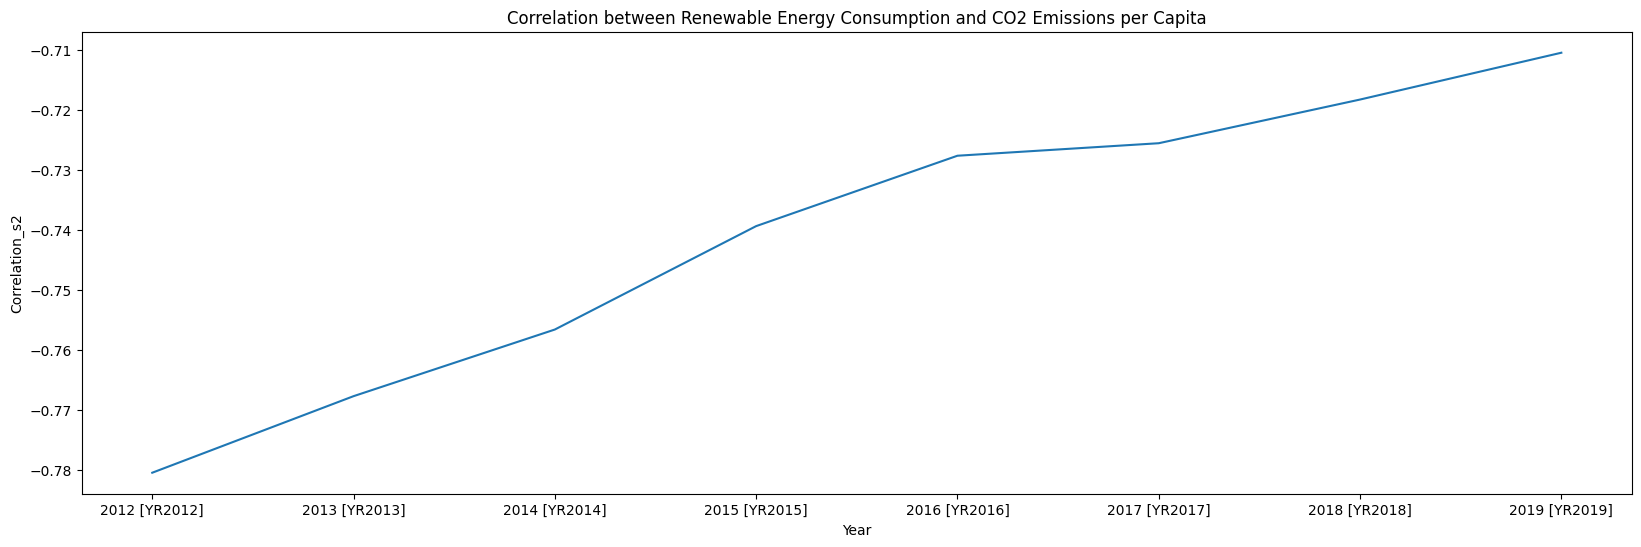

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x="Year", y="Correlation_s2", data=s2_results, ax=ax)
ax.set_title('Correlation between Renewable Energy Consumption and CO2 Emissions per Capita')
plt.show()

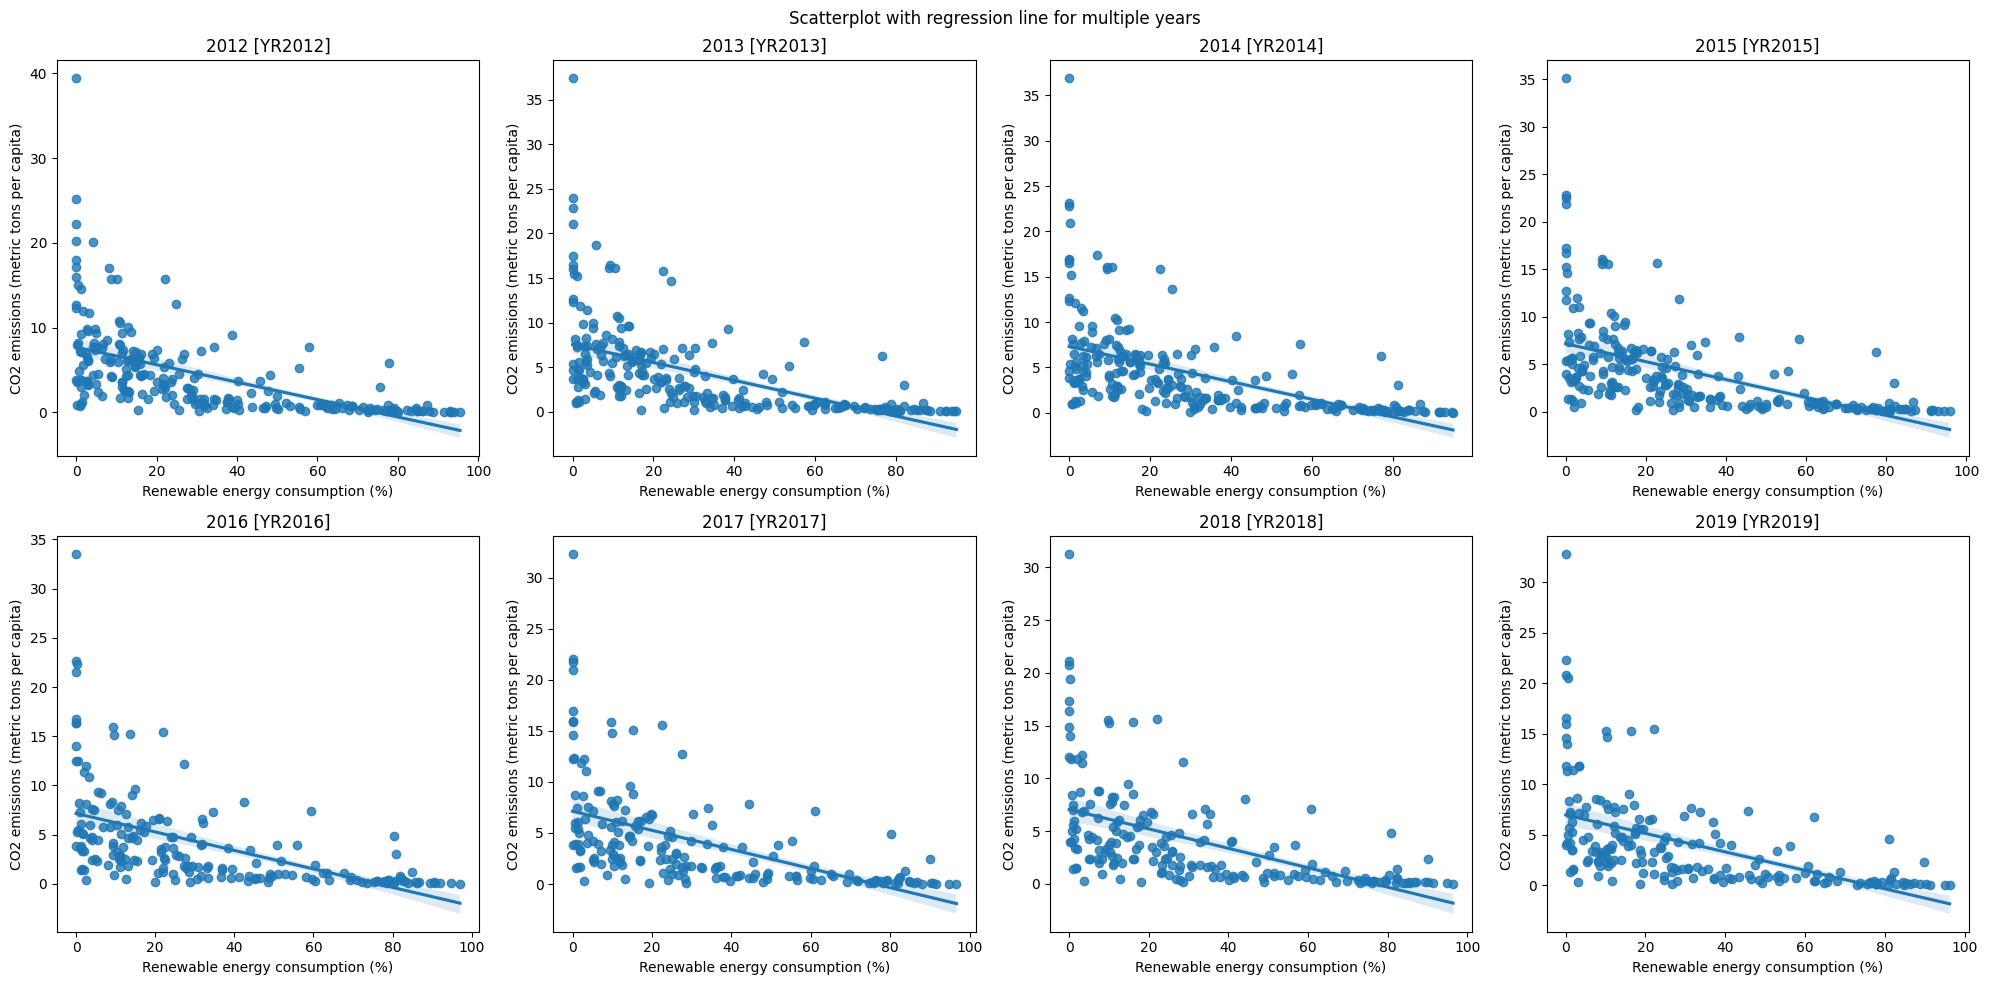

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for idx, year in enumerate(years):
    # Convert the data to numeric
    re[year] = pd.to_numeric(re[year], errors='coerce')
    co[year] = pd.to_numeric(co[year], errors='coerce')

    # Merge 
    merged_df = re[['Country Code', year]].merge(co[['Country Code', year]], on='Country Code', suffixes=('_renew', '_co2'))

    # Drop rows containing NaN values
    merged_df = merged_df.dropna()

    # Calculate the subplot row and column
    row = idx // 4
    col = idx % 4

    # Create the scatterplot with regression line in the current subplot
    try:
      sns.regplot(x=merged_df[year + '_renew'], y=merged_df[year + '_co2'], ax=axes[row, col])
    except:
      pass

    # Set plot labels
    try:
      axes[row, col].set_xlabel('Renewable energy consumption (%)')
      axes[row, col].set_ylabel('CO2 emissions (metric tons per capita)')
      axes[row, col].set_title(f"{year}")
    except:
      pass

# Add a title for the entire figure
fig.suptitle("Scatterplot with regression line for multiple years")

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

# Hypothesis 3 - Do countries with higher government expenditure on healthcare have lower infant mortality rates?

## Pearson Correlation Coefficient

In [ ]:
# Filter the data for the fields we're interested in
hc= world_dev[world_dev['Series Code'] == 'SH.XPD.GHED.GE.ZS']
mr = world_dev[world_dev['Series Code'] == 'SP.DYN.IMRT.IN']
hc = hc.reset_index(drop=True)
mr = mr.reset_index(drop=True)

p3_correlations = []
p3_p_values = []
# Loop through the years and calculate the correlation for each year
for year in years:
    # Select data for the specific year and drop any rows with missing data
    data_year = pd.DataFrame({
        'Domestic general government health expenditure': hc[year],
        'Mortality rate': mr[year]
    }).dropna()

    # Calculate the correlation and p-value
    if len(data_year['Domestic general government health expenditure']) >= 10 and len(data_year['Mortality rate']) >= 10:
        # Calculate the correlation and p-value
        correlation, p_value = pearsonr(data_year['Domestic general government health expenditure'], data_year['Mortality rate'])
    else:
        correlation, p_value = None, None

    p3_correlations.append(correlation)
    p3_p_values.append(p_value)
p3_results = pd.DataFrame({
    'Year': years,
    'Correlation': p3_correlations,
    'p_value': p3_p_values
})

In [ ]:
print(p3_results)

            Year  Correlation       p_value
0  2012 [YR2012]    -0.638613  2.419498e-25
1  2013 [YR2013]    -0.634521  1.314901e-24
2  2014 [YR2014]    -0.612647  1.020173e-22
3  2015 [YR2015]    -0.605192  2.269629e-22
4  2016 [YR2016]    -0.596614  1.539449e-21
5  2017 [YR2017]    -0.615204  2.948713e-23
6  2018 [YR2018]    -0.635493  1.063251e-24
7  2019 [YR2019]    -0.632318  9.962022e-24
8  2020 [YR2020]          NaN           NaN
9  2021 [YR2021]          NaN           NaN


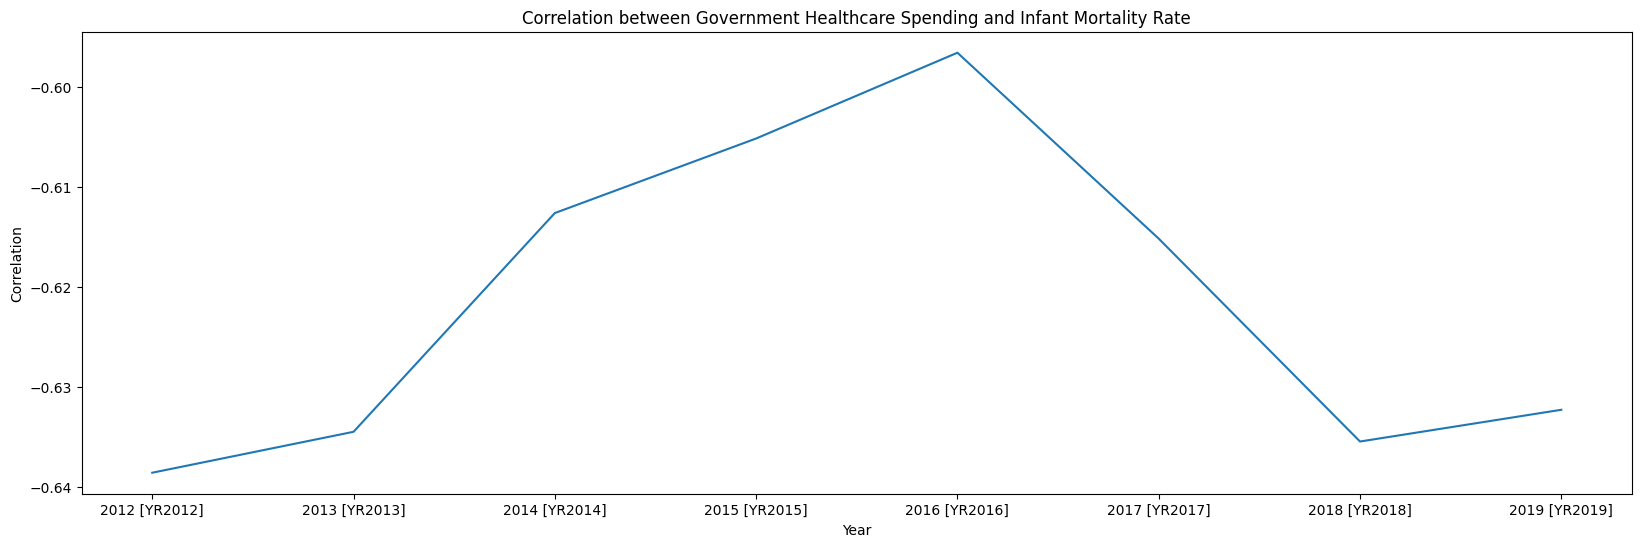

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x="Year", y="Correlation", data=p3_results, ax=ax)
ax.set_title('Correlation between Government Healthcare Spending and Infant Mortality Rate')
plt.show()

## Spearman's Rank Correlation

In [ ]:
spear3_correlations = []
spear3_p_values = []

In [ ]:
for year in years:
    # Select data for the specific year and drop any rows with missing data
    data_year = pd.DataFrame({
        'Domestic general government health expenditure': hc[year],
        'Mortality rate': mr[year]
    }).dropna()

    # Calculate the correlation and p-value
    if len(data_year['Domestic general government health expenditure']) >= 10 and len(data_year['Mortality rate']) >= 10:
        # Calculate the correlation and p-value
        correlation, p_value = spearmanr(data_year['Domestic general government health expenditure'], data_year['Mortality rate'])
    else:
        correlation, p_value = None, None

    spear3_correlations.append(correlation)
    spear3_p_values.append(p_value)
results_spear3 = pd.DataFrame({
    'Year': years,
    'Correlation_Spearman': spear3_correlations,
    'p_value': spear3_p_values
})

In [ ]:
print(results_spear3)

            Year  Correlation_Spearman       p_value
0  2012 [YR2012]             -0.698224  7.065083e-32
1  2013 [YR2013]             -0.684900  7.259404e-30
2  2014 [YR2014]             -0.674857  7.230637e-29
3  2015 [YR2015]             -0.671803  6.337361e-29
4  2016 [YR2016]             -0.665481  4.213020e-28
5  2017 [YR2017]             -0.670146  9.675503e-29
6  2018 [YR2018]             -0.692309  9.924638e-31
7  2019 [YR2019]             -0.687638  2.427349e-29
8  2020 [YR2020]                   NaN           NaN
9  2021 [YR2021]                   NaN           NaN


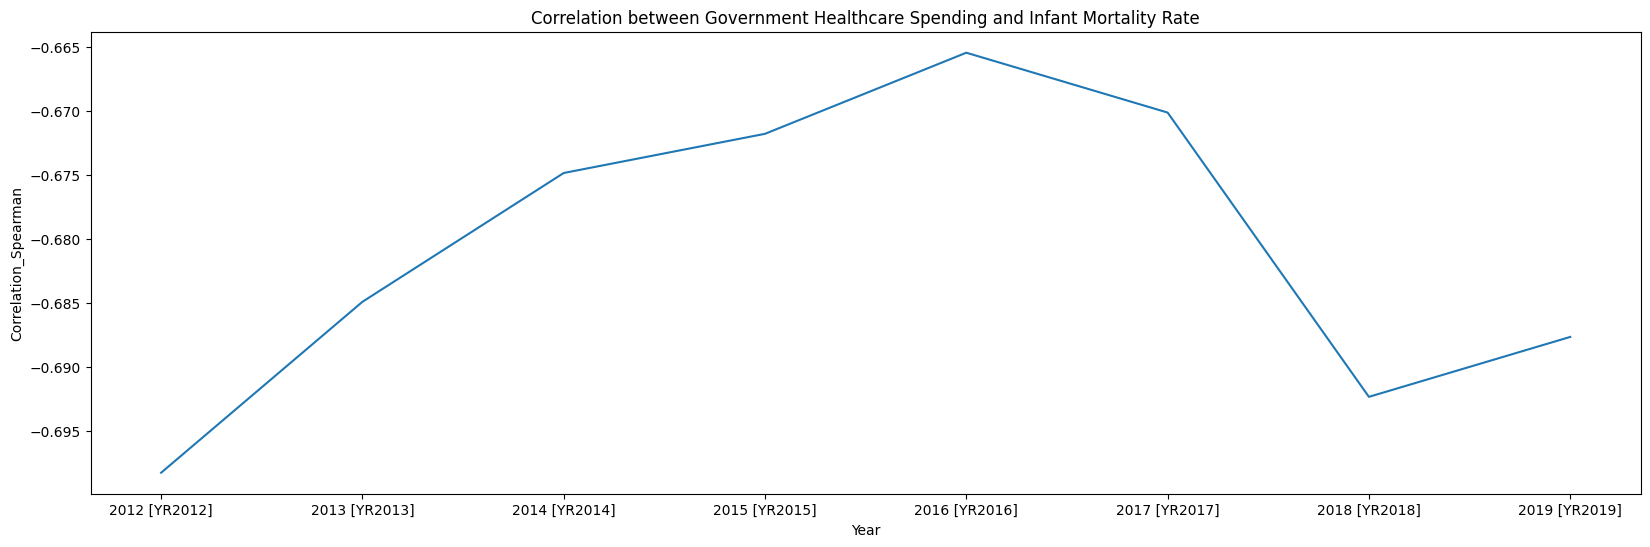

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x="Year", y="Correlation_Spearman", data=results_spear3, ax=ax)
ax.set_title('Correlation between Government Healthcare Spending and Infant Mortality Rate')
plt.show()

## Scatterplot with Regression Line

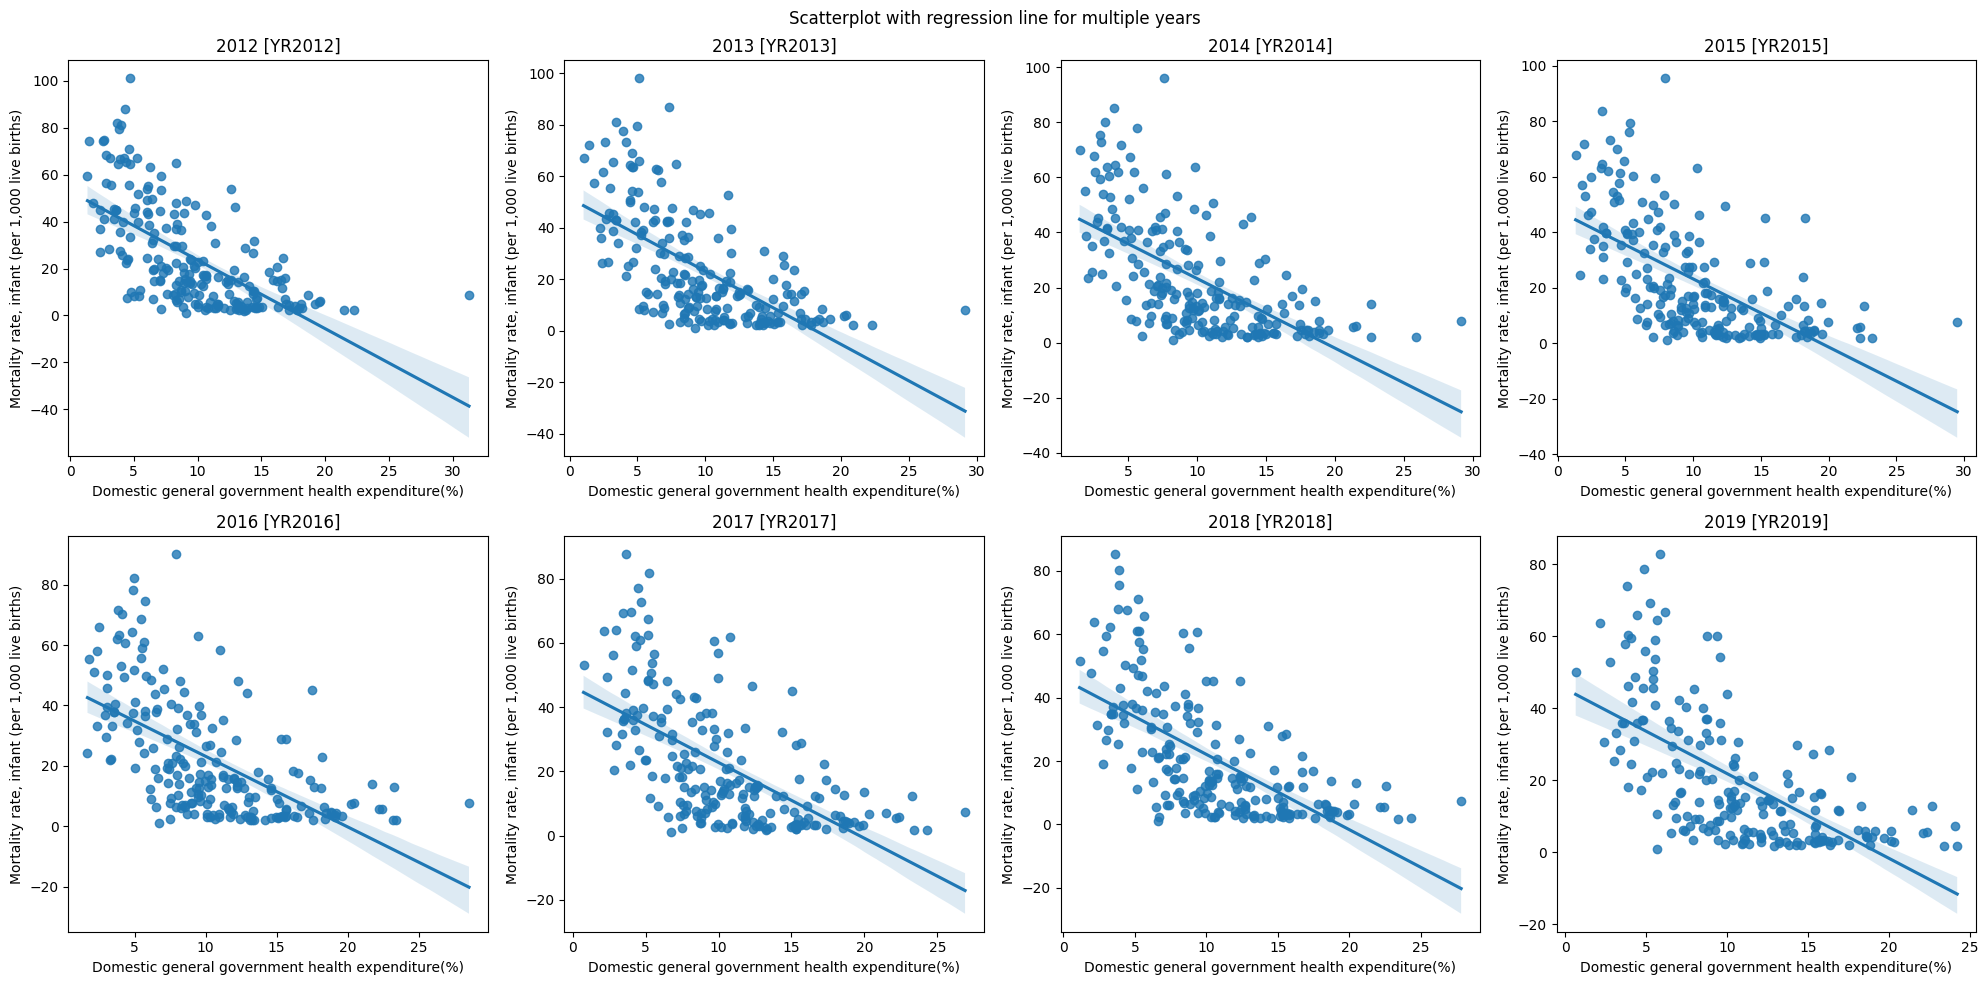

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for idx, year in enumerate(years):
    # Convert the data to numeric
    hc[year] = pd.to_numeric(hc[year], errors='coerce')
    mr[year] = pd.to_numeric(mr[year], errors='coerce')

    # Merge the school_enrollment and gdp_per_capita DataFrames on the 'Country Code' column
    merged_df = hc[['Country Code', year]].merge(mr[['Country Code', year]], on='Country Code', suffixes=('_expenditure', '_morality'))

    # Drop rows containing NaN values
    merged_df = merged_df.dropna()

    # Calculate the subplot row and column
    row = idx // 4
    col = idx % 4

    # Create the scatterplot with regression line in the current subplot
    try:
      sns.regplot(x=merged_df[year + '_expenditure'], y=merged_df[year + '_morality'], ax=axes[row, col])
    except:
      pass

    # Set plot labels
    try:
      axes[row, col].set_xlabel('Domestic general government health expenditure(%)')
      axes[row, col].set_ylabel('Mortality rate, infant (per 1,000 live births)')
      axes[row, col].set_title(f"{year}")
    except:
      pass

# Add a title for the entire figure
fig.suptitle("Scatterplot with regression line for multiple years")

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()